No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


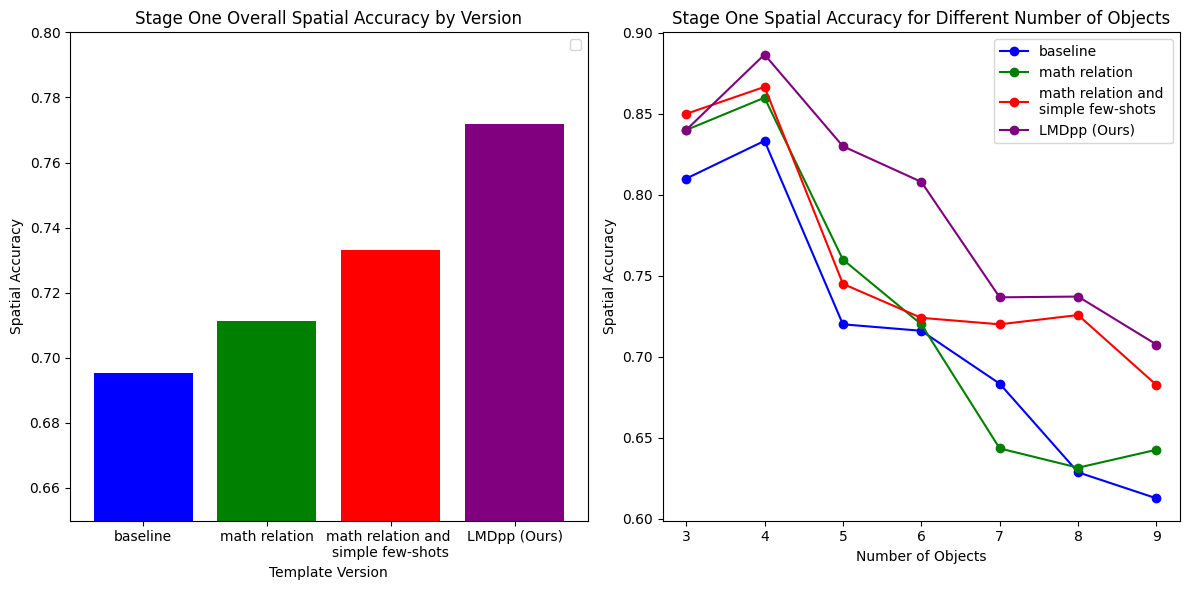

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import json

# Data
versions = ['baseline', 'math relation', 'math relation and \nsimple few-shots', 'LMDpp (Ours)']
data = {}
for version in [1, 4, 7, 9]:
    cur_version_data = json.load(open(f'results/spatial_results_v0.{version}.json'))
    data[version] = cur_version_data

overall_spatial_accuracy = [d['overall'] for d in data.values()]
objects_count = np.arange(3, 10)

# Calculate spatial accuracy for different object counts
spatial_accuracy = {
    version: [i for i in d.values()][1:]
    for version, d in data.items()
}

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Overall Spatial Accuracy Bar Plot
ax[0].bar(versions, overall_spatial_accuracy, color=['blue', 'green', 'red', 'purple'])
ax[0].set_title('Stage One Overall Spatial Accuracy by Version')
ax[0].set_xlabel('Template Version')
ax[0].set_ylabel('Spatial Accuracy')
ax[0].set_ylim(0.65, 0.8)
ax[0].legend()

# Spatial Accuracy by Number of Objects Line Plot
colors = ['blue', 'green', 'red', 'purple']
for i, version in enumerate([1, 4, 7, 9]):
    ax[1].plot(objects_count, spatial_accuracy[version], '-o', color=colors[i], label=versions[i])  # Use versions[i] for the label

ax[1].set_title('Stage One Spatial Accuracy for Different Number of Objects')
ax[1].set_xlabel('Number of Objects')
ax[1].set_ylabel('Spatial Accuracy')

# Update the legend to match the versions list
ax[1].legend()  # The labels are now automatically matched to `versions` via the `label` parameter in the plot

plt.tight_layout()
plt.show()


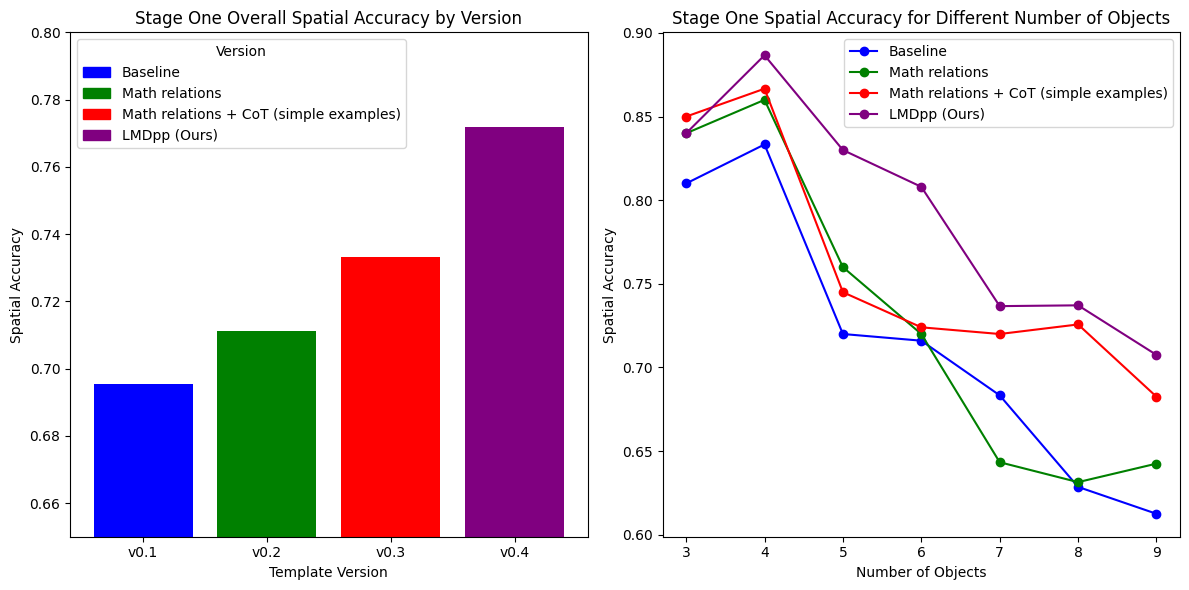

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import json
from matplotlib.patches import Patch  # Import Patch

# Data
versions = ['Baseline', 'Math relations', 'Math relations + CoT (simple examples)', 'LMDpp (Ours)']
data = {}
for version in [1, 4, 7, 9]:
    cur_version_data = json.load(open(f'results/spatial_results_v0.{version}.json'))
    data[version] = cur_version_data

overall_spatial_accuracy = [d['overall'] for d in data.values()]
objects_count = np.arange(3, 10)

# Calculate spatial accuracy for different object counts
spatial_accuracy = {
    version: [i for i in d.values()][1:]
    for version, d in data.items()
}

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Overall Spatial Accuracy Bar Plot
colors = ['blue', 'green', 'red', 'purple']
ax[0].bar(['v0.1', 'v0.2', 'v0.3', 'v0.4'], overall_spatial_accuracy, color=colors)
ax[0].set_title('Stage One Overall Spatial Accuracy by Version')
ax[0].set_xlabel('Template Version')
ax[0].set_ylabel('Spatial Accuracy')
ax[0].set_ylim(0.65, 0.8)

# Create legend entries for the bar plot
legend_patches = [Patch(color=colors[i], label=versions[i]) for i in range(len(versions))]
ax[0].legend(handles=legend_patches, title="Version")

# Spatial Accuracy by Number of Objects Line Plot
for i, version in enumerate([1, 4, 7, 9]):
    ax[1].plot(objects_count, spatial_accuracy[version], '-o', color=colors[i], label=versions[i])

ax[1].set_title('Stage One Spatial Accuracy for Different Number of Objects')
ax[1].set_xlabel('Number of Objects')
ax[1].set_ylabel('Spatial Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()


In [3]:
data

{1: {'overall': 0.6954672619047619,
  '3': 0.81,
  '4': 0.8333333333333333,
  '5': 0.72,
  '6': 0.716,
  '7': 0.6833333333333331,
  '8': 0.6285714285714286,
  '9': 0.6125},
 4: {'overall': 0.7113244047619047,
  '3': 0.84,
  '4': 0.86,
  '5': 0.76,
  '6': 0.72,
  '7': 0.6433333333333333,
  '8': 0.6314285714285715,
  '9': 0.6425},
 7: {'overall': 0.733124007936508,
  '3': 0.85,
  '4': 0.8666666666666666,
  '5': 0.745,
  '6': 0.7239999999999999,
  '7': 0.7200000000000002,
  '8': 0.7257142857142855,
  '9': 0.6825},
 9: {'overall': 0.7718581349206349,
  '3': 0.84,
  '4': 0.8866666666666666,
  '5': 0.83,
  '6': 0.8079999999999999,
  '7': 0.7366666666666666,
  '8': 0.7371428571428571,
  '9': 0.7075}}

In [ ]:
import json
import matplotlib.pyplot as plt

model = "yolov8m"
templates = [1, 4, 7, 9]
versions = ['v0.1 - gpt3.5-turbo', 'v0.4 - gpt3.5-turbo'] + [f'v0.{i} - gpt4' for i in templates] 
data = []
spatial_accuracy = []
extra_miss_ratio = []
mean_iou = []

for t in [1, 4]:
    cur_template_data = json.load(open(f'results/{model}_evaluation_result_img_generations_templatev0.{t}_lmd_plus_lmd_spatial_gpt-3.5_sdxl_0.3.json'))
    data.append(cur_template_data)
    spatial_accuracy.append(cur_template_data['spatial_accuracy'])
    extra_miss_ratio.append(cur_template_data['extra_miss_ratio'])
    mean_iou.append(cur_template_data['mean_iou'])
    
for t in templates:
    cur_template_data = json.load(open(f'results/{model}_evaluation_result_img_generations_templatev0.{t}_lmd_plus_lmd_spatial_gpt-4_sdxl_0.3.json'))
    data.append(cur_template_data)
    spatial_accuracy.append(cur_template_data['spatial_accuracy'])
    extra_miss_ratio.append(cur_template_data['extra_miss_ratio'])
    mean_iou.append(cur_template_data['mean_iou'])




fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharex=True, sharey=True)
# Plot for spatial accuracy
bars = ax[0].bar(versions, spatial_accuracy, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
ax[0].set_title('Overall Stage 2 Average Spatial Accuracy by Version (Raw prompt vs Image) YOYOv8m (new)')
ax[0].set_ylabel('Spatial Accuracy')
ax[0].set_xlabel('Version')
for bar in bars:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2., 1.01*height, f'{height:.4f}', ha='center', va='bottom')

# Plot for extra/miss ratio
bars = ax[1].bar(versions, extra_miss_ratio, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
ax[1].set_title('Overall Extra/Miss Ratio by Version (LLM Layout vs Image)')
ax[1].set_ylabel('Extra Miss Ratio')
ax[1].set_xlabel('Version')
for bar in bars:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2., 1.01*height, f'{height:.4f}', ha='center', va='bottom')

# Plot for mean IoU
bars = ax[2].bar(versions, mean_iou, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
ax[2].set_title('Overall Mean IoU by Version (LLM Layout vs Image)')
ax[2].set_ylabel('Mean IoU')
ax[2].set_xlabel('Version')
for bar in bars:
    height = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width() / 2., 1.01*height, f'{height:.4f}', ha='center', va='bottom')

plt.show()
# ax[0].bar(versions, spatial_accuracy, color=['blue', 'green', 'red', 'purple'])
# ax[0].set_title('Overall Stage 2 Average Spatial Accuracy by Version (Raw prompt vs Image) YOYOv8x')
# ax[0].set_ylabel('Spatial Accuracy')
# ax[0].set_xlabel('Version')  

# ax[1].bar(versions, extra_miss_ratio, color=['blue', 'green', 'red', 'purple'])
# ax[1].set_title('Overall Extra/Miss Ratio by Version (LLM Layout vs Image)')
# ax[1].set_ylabel('Extra Miss Ratio')
# ax[1].set_xlabel('Version')

# ax[2].bar(versions, mean_iou, color=['blue', 'green', 'red', 'purple'])
# ax[2].set_title('Overall Mean IoU by Version (LLM Layout vs Image)')
# ax[2].set_ylabel('Mean IoU')
# ax[2].set_xlabel('Version')
# # ax.set_ylim(0.65, 0.8)
# plt.show()

In [ ]:
import json
import matplotlib.pyplot as plt

model = "yolov8m"
templates = [1, 4, 7, 9]
# versions = ['sdxl', 'tokencompose']+[f'v0.{i}' for i in templates]
versions = ['v0.1 - gpt3.5-turbo', 'v0.4 - gpt3.5-turbo'] + [f'v0.{i} - gpt4' for i in templates] 
data = []
spatial_accuracy = []
extra_miss_ratio = []
mean_iou = []
uni_det = []
# for m in ['sdxl', 'tokencompose']:
#     cur_template_data = json.load(open(f'results/{model}_evaluation_result_spatial_{m}.json'))
#     data.append(cur_template_data)
#     spatial_accuracy.append(cur_template_data['spatial_accuracy'])
#     extra_miss_ratio.append(cur_template_data['extra_miss_ratio'])
    # mean_iou.append(cur_template_data['mean_iou'])
    # uni_det.append(cur_template_data['UniDet'])
for t in [1, 4]:
    cur_template_data = json.load(open(f'results/{model}_evaluation_result_img_generations_templatev0.{t}_lmd_plus_lmd_spatial_gpt-3.5_sdxl_0.3.json'))
    data.append(cur_template_data)
    spatial_accuracy.append(cur_template_data['spatial_accuracy'])
    extra_miss_ratio.append(cur_template_data['extra_miss_ratio'])
    # mean_iou.append(cur_template_data['mean_iou'])
    uni_det.append(cur_template_data['UniDet'])

for t in templates:
    cur_template_data = json.load(open(f'results/{model}_evaluation_result_img_generations_templatev0.{t}_lmd_plus_lmd_spatial_gpt-4_sdxl_0.3.json'))
    data.append(cur_template_data)
    spatial_accuracy.append(cur_template_data['spatial_accuracy'])
    extra_miss_ratio.append(cur_template_data['extra_miss_ratio'])
    # mean_iou.append(cur_template_data['mean_iou'])
    uni_det.append(cur_template_data['UniDet'])


fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharex=True, sharey=True)
# Plot for spatial accuracy
bars = ax[0].bar(versions, spatial_accuracy, color=['blue', 'green', 'red', 'purple', 'black', 'pink'])
ax[0].set_title(f'Overall Stage 2 Average Spatial Accuracy by Version (Raw prompt vs Image) {model}')
ax[0].set_ylabel('Spatial Accuracy')
ax[0].set_xlabel('Version')
for bar in bars:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2., 1.01*height, f'{height:.4f}', ha='center', va='bottom')

# Plot for extra/miss ratio
bars = ax[1].bar(versions, extra_miss_ratio, color=['blue', 'green', 'red', 'purple', 'black', 'pink'])
ax[1].set_title('Overall Extra/Miss Ratio by Version (LLM Layout vs Image)')
ax[1].set_ylabel('Extra Miss Ratio')
ax[1].set_xlabel('Version')
for bar in bars:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2., 1.01*height, f'{height:.4f}', ha='center', va='bottom')

# Plot for mean IoU
bars = ax[2].bar(versions, uni_det, color=['blue', 'green', 'red', 'purple', 'black', 'pink'])
ax[2].set_title('Overall Mean Uni_Det by Version (LLM Layout vs Image)')
ax[2].set_ylabel('Mean IoU')
ax[2].set_xlabel('Version')
for bar in bars:
    height = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width() / 2., 1.01*height, f'{height:.4f}', ha='center', va='bottom')

plt.show()

In [ ]:
# Assuming the JSON loading and data extraction process is similar for all models
import numpy as np
models = ["yolov8m", "yolov8x", "yolov9e"]
templates = [1, 4, 7, 9]
versions = [f'v0.{i}' for i in templates]

# Initialize dictionaries to store metrics for all models
spatial_accuracy = {model: [] for model in models}
extra_miss_ratio = {model: [] for model in models}
mean_iou = {model: [] for model in models}

# Mocking JSON data loading with random values as placeholders
# Replace this section with your actual JSON loading and data extraction logic
# np.random.seed(0)  # For reproducible random results
for model in models:
    for t in templates:
        # Placeholder for JSON data loading logic
        # You should replace this section with actual data extraction from your JSON files
        # spatial_accuracy[model].append(np.random.rand())
        # extra_miss_ratio[model].append(np.random.rand())
        # mean_iou[model].append(np.random.rand())
        cur_template_data = json.load(open(f'results/{model}_evaluation_result_img_generations_templatev0.{t}_lmd_plus_lmd_spatial_gpt-4_sdxl_0.3.json'))
        data.append(cur_template_data)
        spatial_accuracy[model].append(cur_template_data['spatial_accuracy'])
        extra_miss_ratio[model].append(cur_template_data['extra_miss_ratio'])
        mean_iou[model].append(cur_template_data['mean_iou'])

# Creating the side-by-side bar chart
fig, ax = plt.subplots(3, 1, figsize=(15, 18), sharex=True)
width = 0.2  # Width of the bars

for i, metric in enumerate([spatial_accuracy, extra_miss_ratio, mean_iou]):
    for j, model in enumerate(models):
        # Calculate the bar positions
        positions = np.arange(len(versions)) + j * width
        values = metric[model]
        bars = ax[i].bar(positions, values, width, label=model)
        
        # Adding text labels above bars
        for bar in bars:
            height = bar.get_height()
            ax[i].text(bar.get_x() + bar.get_width() / 2., 1.01*height, f'{height:.4f}', ha='center', va='bottom')
    
    ax[i].set_xticks(np.arange(len(versions)) + width)
    ax[i].set_xticklabels(versions)

# Set titles and labels
ax[0].set_title('Spatial Accuracy Comparison')
ax[1].set_title('Extra/Miss Ratio Comparison')
ax[2].set_title('Mean IoU Comparison')
for a in ax:
    a.set_ylabel('Value')
    a.set_xlabel('Version')
    a.legend(title="Model")

plt.tight_layout()
plt.show()